In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

## Data Cleaning

In [4]:
# Convert date columns to datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"], errors="coerce")
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], errors="coerce")

# Handle any rows with invalid dates
customers.dropna(subset=["SignupDate"], inplace=True)
transactions.dropna(subset=["TransactionDate"], inplace=True)

# Check for and handle missing values
customers.fillna("Unknown", inplace=True)
products.fillna("Unknown", inplace=True)
transactions.fillna(0, inplace=True)

print(f"\033[1mcustomers\033[0m \n{customers}, \n \033[1mproducts\033[0m \n{products}, \n \033[1mtransactions\033[0m \n{transactions}")

customers 
    CustomerID        CustomerName         Region SignupDate
0        C0001    Lawrence Carroll  South America 2022-07-10
1        C0002      Elizabeth Lutz           Asia 2022-02-13
2        C0003      Michael Rivera  South America 2024-03-07
3        C0004  Kathleen Rodriguez  South America 2022-10-09
4        C0005         Laura Weber           Asia 2022-08-15
..         ...                 ...            ...        ...
195      C0196         Laura Watts         Europe 2022-06-07
196      C0197    Christina Harvey         Europe 2023-03-21
197      C0198         Rebecca Ray         Europe 2022-02-27
198      C0199      Andrea Jenkins         Europe 2022-12-03
199      C0200         Kelly Cross           Asia 2023-06-11

[200 rows x 4 columns], 
 products 
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography      

## Data Visualization

In [6]:
#--------- for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Exploring the Customers Data

Customer Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25% 

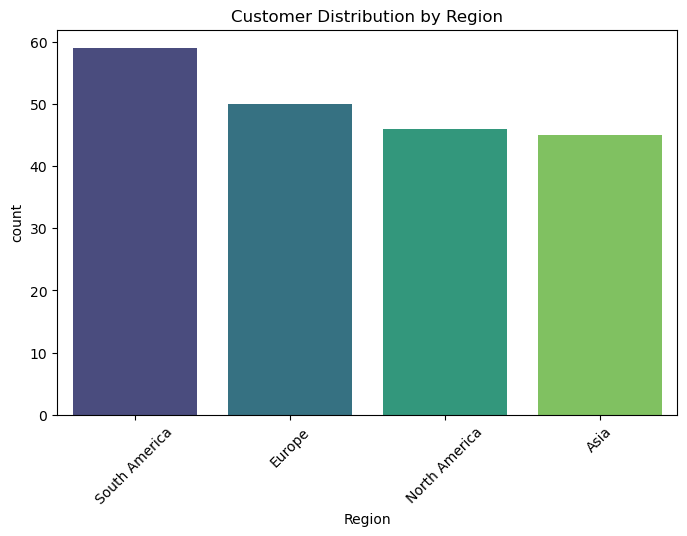

In [8]:
print("\033[1mCustomer Data Overview:\033[0m")
print(customers.info())
print(customers.describe(include='all'))
print(customers["Region"].value_counts())
    
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()


### Exploring the Products Data

Product Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN

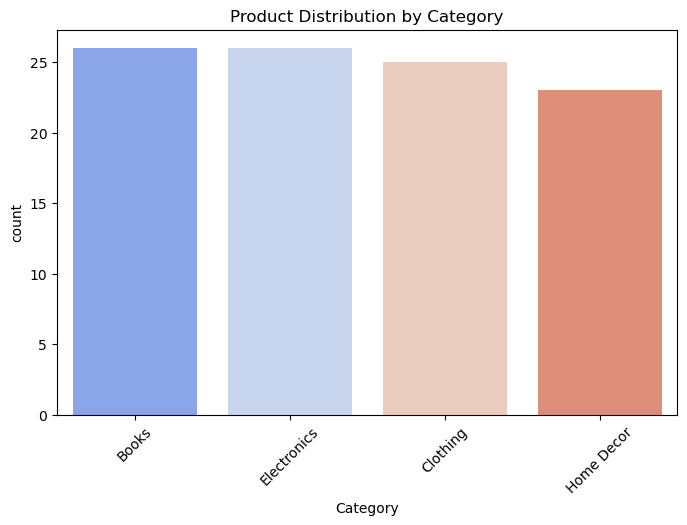

In [10]:
print("\033[1mProduct Data Overview:\033[0m")
print(products.info())
print(products.describe(include='all'))
print(products["Category"].value_counts())
    
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x="Category", order=products["Category"].value_counts().index, palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.show()

### Exploring the Transactions Data

Transaction Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25% 

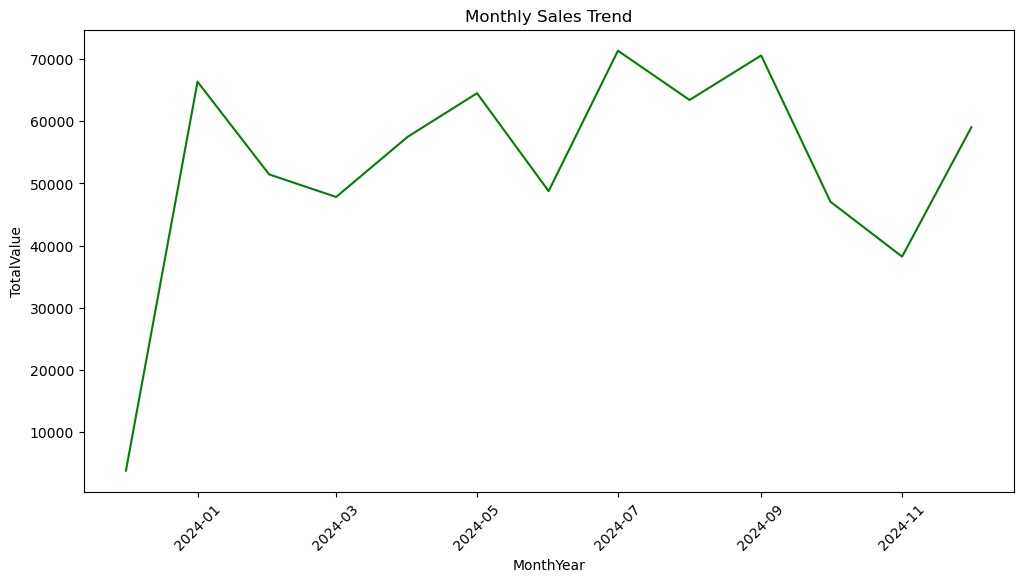

Top 10 Products by Sales:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


In [12]:
print("Transaction Data Overview:")
print(transactions.info())
print(transactions.describe())

# Temporal Analysis
transactions["MonthYear"] = transactions["TransactionDate"].dt.to_pydatetime().astype('datetime64[M]')
monthly_sales = transactions.groupby("MonthYear")["TotalValue"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="MonthYear", y="TotalValue", color="green")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.savefig("monthly_sales_trend.png")
plt.show()

# Top Products
top_products = transactions.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:")
print(top_products)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np